#Book Recommendation System

This project builds a content-based book recommendation system using the K-Nearest Neighbors (KNN) algorithm.

**Key Concepts**:
- Text preprocessing with TF-IDF
- KNN for recommendation
- User interaction via input function

**Goal**: Recommend top similar books based on the one selected by the user.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [ ]:
df= pd.read_csv('books KNN Algorithm.csv', on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [ ]:
df.info()
#no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(11123, 12)

# EDA

In [ ]:
df.describe(include="object")

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Brothers Karamazov,Stephen King,8497646983,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [ ]:
df.select_dtypes(include="number").columns

Index(['bookID', 'average_rating', 'isbn13', '  num_pages', 'ratings_count',
       'text_reviews_count'],
      dtype='object')

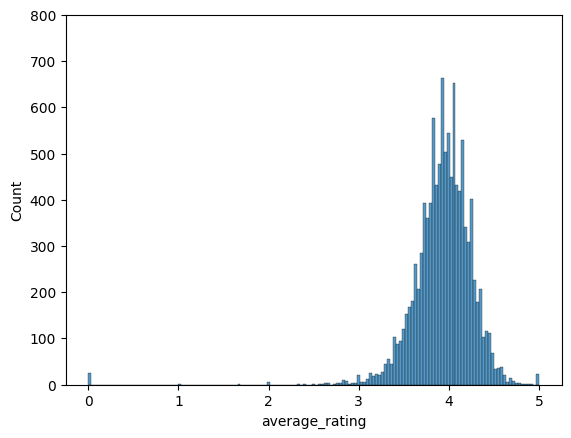

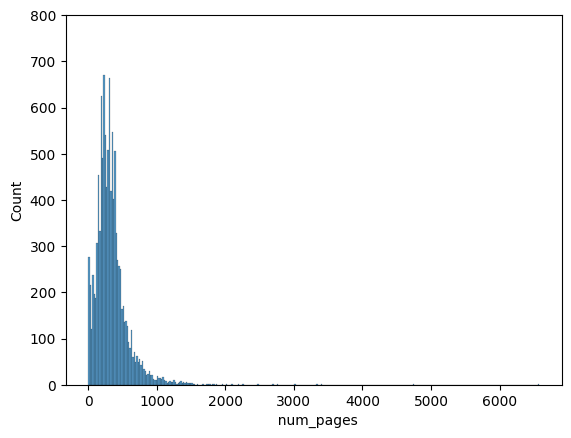

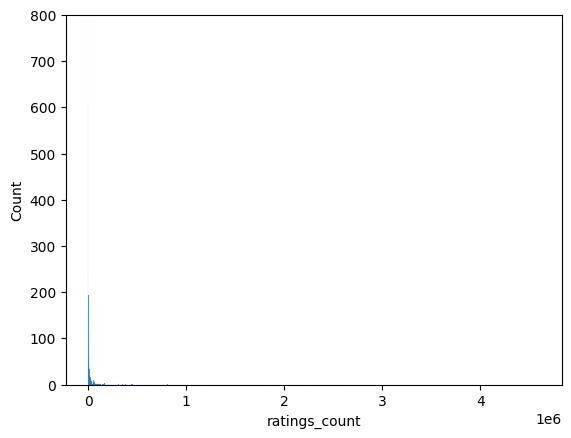

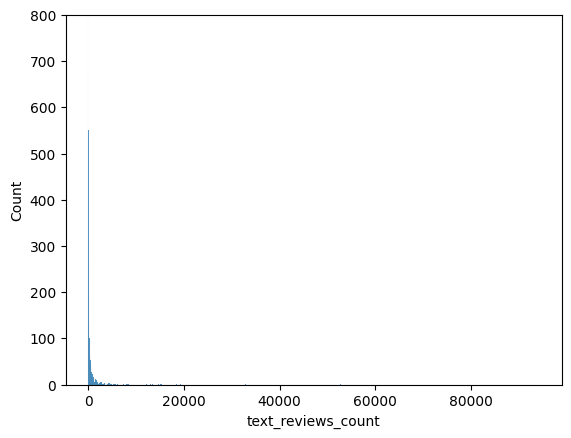

In [ ]:
for i in ['average_rating', '  num_pages', 'ratings_count',
       'text_reviews_count']:
  sns.histplot(data=df, x=i)
  plt.ylim(0, 800)
  plt.show()

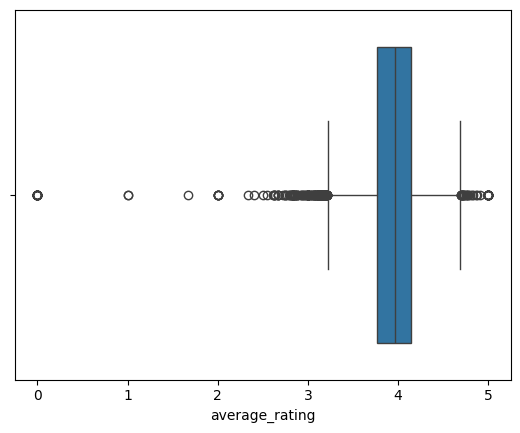

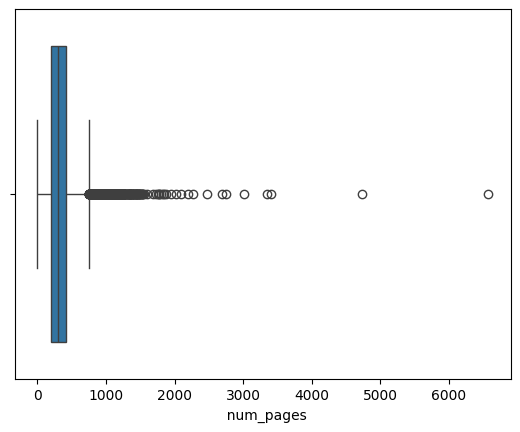

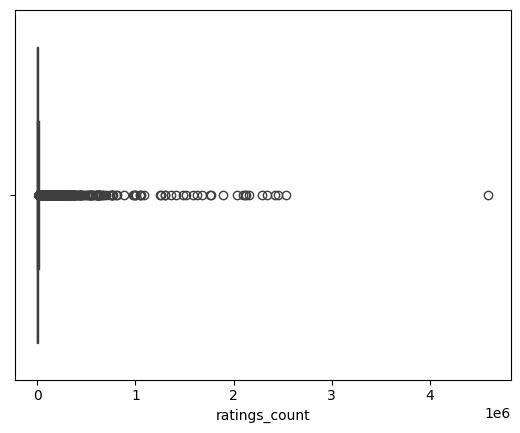

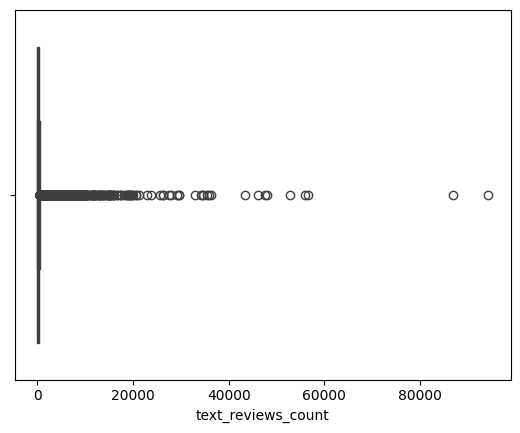

In [ ]:
for i in ['average_rating', '  num_pages', 'ratings_count',
       'text_reviews_count']:
  sns.boxplot(data=df, x=i)
  plt.show()

<Axes: >

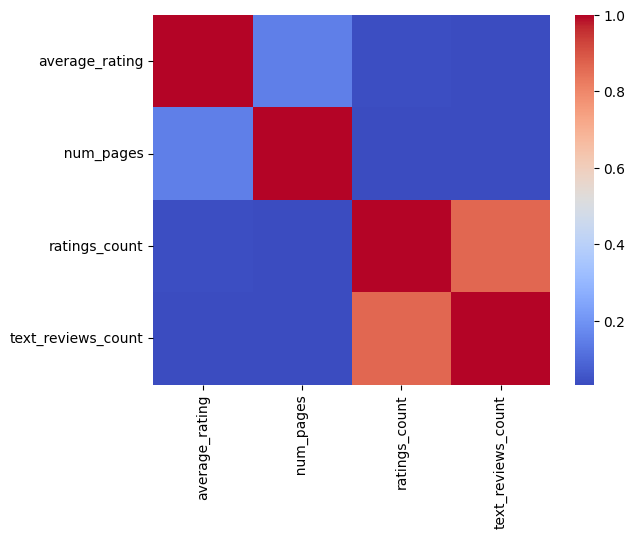

In [ ]:
cols = ['average_rating', '  num_pages', 'ratings_count',
       'text_reviews_count']
s= df[cols].corr()
sns.heatmap(s, cmap='coolwarm')

# Cleaning

In [ ]:
dummy= pd.get_dummies(data=df,columns=["publication_date","language_code"],drop_first=True)

In [ ]:
dummy

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publisher,...,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,652,2095690,27591,Scholastic Inc.,...,False,False,False,False,False,False,False,False,False,False
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,870,2153167,29221,Scholastic Inc.,...,False,False,False,False,False,False,False,False,False,False
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,352,6333,244,Scholastic,...,False,False,False,False,False,False,False,False,False,False
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,435,2339585,36325,Scholastic Inc.,...,False,False,False,False,False,False,False,False,False,False
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2690,41428,164,Scholastic,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,512,156,20,Da Capo Press,...,False,False,False,False,False,False,False,False,False,False
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,635,783,56,Penguin Books,...,False,False,False,False,False,False,False,False,False,False
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,415,820,95,Penguin Books,...,False,False,False,False,False,False,False,False,False,False
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,434,769,139,Ecco,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['publisher']= df['publisher'].fillna('')
df['publication_year']=df['publication_date'].str[:4].fillna('')

#KNN

In [ ]:
df['combined_features'] = (
    df['title'] + ' ' +
    df['authors'] + ' ' +
    df['language_code'] + ' ' +
    df['publisher']+ ' ' +
    df['publication_year']
)
df['combined_features']

,combined_features
0,Harry Potter and the Half-Blood Prince (Harry ...
1,Harry Potter and the Order of the Phoenix (Har...
2,Harry Potter and the Chamber of Secrets (Harry...
3,Harry Potter and the Prisoner of Azkaban (Harr...
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...
...,...
11118,Expelled from Eden: A William T. Vollmann Read...
11119,You Bright and Risen Angels William T. Vollman...
11120,The Ice-Shirt (Seven Dreams #1) William T. Vol...
11121,Poor People William T. Vollmann eng Ecco 2/27


In [ ]:
vectorizer= TfidfVectorizer(stop_words='english')
tfidf_matrix=vectorizer.fit_transform(df['combined_features'])

In [ ]:
n_neighbors = 6 #5 books + the book itself
model= NearestNeighbors(n_neighbors=n_neighbors, metric ='cosine')
model.fit(tfidf_matrix)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [ ]:
title_index=pd.Series(df.index, index=df['title'].apply(lambda x:x.lower()))

In [ ]:
def recommendation(title, model=model, df=df, title_index=title_index):
  title=title.lower()
  if title not in title_index:
        return None
  idx = title_index[title.lower()]
  distance, indices= model.kneighbors(tfidf_matrix[idx])
  indices= indices[0][1:] #excludes the book itself index
  return df['title'].iloc[indices].values.tolist()

In [ ]:
def main():
  while True:
    book_title=input("Enter book title or 'end to exit': ")
    if book_title.lower()=='end':
       break
    if book_title.lower() not in title_index:
      print("Sorry, book not found")
      continue

    rec = recommendation(book_title)
    if rec:
       print("\nYou might also like:")
       for r in rec:
          print("-", r)
    else:
       print("No recommendations found.")
main()


Enter book title or 'end to exit': end
